LDA is a supervised dimensionality reduction technique

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir("D:\\meridianthe4\\PML")

In [13]:
iris = pd.read_csv("iris.csv")
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
#Label encoding Type column
le = LabelEncoder()

iris['Species'] = le.fit_transform(iris['Species'])
X, y = iris.drop("Species", axis=1), iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=25)

In [15]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

y_pred_prob = lda.predict_proba(X_test)
print("Log Loss =",log_loss(y_test,y_pred_prob))

y_pred = lda.predict(X_test)
print("Accuracy =",accuracy_score(y_test,y_pred))


Log Loss = 0.0851320988864543
Accuracy = 0.9555555555555556


In [16]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)

y_pred_prob = qda.predict_proba(X_test)
print("Log Loss =",log_loss(y_test,y_pred_prob))

y_pred = qda.predict(X_test)
print("Accuracy =",accuracy_score(y_test,y_pred))


Log Loss = 0.04237087790419334
Accuracy = 0.9777777777777777


**LDA AS DATA TRANSFORMER**

In [17]:
import ipywidgets as widgets
#Interactive python widgets 

In [18]:
#iris = pd.read_csv("iris.csv")

features = ['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']

def plot(col1,col2):
    sns.scatterplot(data=iris,x='Sepal.Width',y='Sepal.Length',hue = 'Species')
    plt.show()

widgets.interact(plot, col1 =features,col2 =features)

interactive(children=(Dropdown(description='col1', options=('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Pe…

<function __main__.plot(col1, col2)>

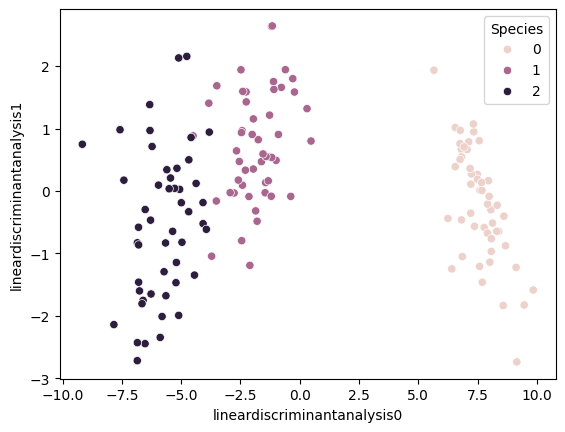

In [24]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')

X, y = iris.drop('Species', axis=1), iris['Species']

lda_components = lda.fit_transform(X, y)
#Perform LDA.fir_transform on X, y
# Gives back two columns

lda_components['Species'] = y

sns.scatterplot(data=lda_components, x='lineardiscriminantanalysis0', 
                            y = 'lineardiscriminantanalysis1', hue='Species')

plt.show()


In [25]:
lda_components

,lineardiscriminantanalysis0,lineardiscriminantanalysis1,Species
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0
...,...,...,...
145,-5.645003,-1.677717,2
146,-5.179565,0.363475,2
147,-4.967741,-0.821141,2
148,-5.886145,-2.345091,2
